In [1]:
#!pip install seaborn --quiet

# Activations and more on networks

In the last notebook, we:
* Built a quadratic function
* Added MSE loss to calculate how wrong we were
* Used gradient descent to learn how to change our weights
* Learned how backpropagation can update weights through complex functions

Now we can go from a singular node doing all of the above, to a neural network of several.

### Understanding neural network architectures

Neural nets generalize to data and a task by having any number (sometimes millions) of computation nodes that make predictions and update weights that inform those predictions.

### Deep learning vs Machine Learning

'Deep' learning emerged as a term to indicate additional hidden layers in a neural network. The majority of network architectures for any problem (vision, text, forecasting etc) fall into this category now, so it's become unneccesary to specify between the two. Throughout this course, I use machine learning and deep learning interchangeably, since we are generally concerned with networks of several hidden layers.

![](https://github.com/rastringer/code_first_ml/blob/main/images/flowers_example.png?raw=true)

Here we see a typical diagram of a neural network. This net classifies flowers based on input features such as sepal and petal measurements. From left to right, we see:
* The input (feature) layer
* Layers of calculation nodes that perform a linear calculation, `weight * input + bias`
* A final output layer determining the probabilities the flower is of a particular kind.


Today, we will build our own simple neural network in vanilla Python with some Numpy. This will help us solidify our understanding of the concepts before we start using frameworks (PyTorch) that make the process far easier.


### Activations

There's one last component we haven't yet covered which we'll now explore: the activation function. If we use our network in its current form, nodes will simply perform linear calculations. This linearity will lead to results which won't generalize well to large datasets and complex tasks. Without activations, all we have is linear regression.

If our nodes perform the linear calculation, $Wx + b$, then three layers would give us:

$W_3(W_2(W_1 + b_1) + b_2) + b_3$

This would simplify to $Ax + b$

This means our network would only learn straight lines and flat planes. Activations add bends, curves and sharp turns that allow a model to consider complex, wiggly patterns in input data. Activations turn linear networks into a universal function approximator.

#### What's a universal function approximator?
The universal approximation theorem states that with enough neurons and non-linear activation functions, we can approximate any continuous function to arbitrary precision. In other words, with enough computation nodes, and suitable activations, a neural network can learn to mimic any pattern or relationship.

Similarly, with enough toy blocks, you could build any tower. This is how neural networks can perform varied tasks such as recognizing geographical images, play games and write poetry.

Let's explore some common activations.

One point we skipped over above is that rather than doing calculations on one weight and input, our nodes are doing a weighted sum calculation of multiple (potentially thousands or millions) of inputs. So we do something along these lines:

`weighted_sum = (weight1 * input1) + (weight2 * input2) + ... + bias`

and our output will be calcuated by the activation function:

`output = activation(weighted_sum)`

The activation roughly mimics our biological neurons, where if an input stimulus reaches a certain threshold, we send further information to act (eg if the pan feels too hot, put it back down).

### Introducing the Sigmoid

<img src="https://github.com/rastringer/ai_sec_course_resources/blob/main/1_intro_to_ml/images/sigmoid.png?raw=true" alt="Sigmoid function">

*Image from Wikipedia*

A good activation to start with is the Sigmoid. It's a smooth decision maker, which takes any number and 'squashes' it into a probability-like value of between 0 and 1. Going back to the biological neuron analogy, it will 'fire' for values that pass a threshold to be close to 1, and will be quiet for values close to 0.

This activation has several benefits:
* Smooth and differentiable, so useful for backpropagation
* Non-linear, so helps for learning complex patterns
* Squashes large inputs to prevent exploding values
* Prevents vanishing gradients (where derivatives can approach zero)



In [2]:
def sigmoid(self, x):
    """Sigmoid activation function - squashes values between 0 and 1"""
    # Clip x to prevent overflow
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

The 'clipping' [-500, 500] prevents the exponential from causing numerical overflow - a practical detail that keeps the mathematics stable in code.

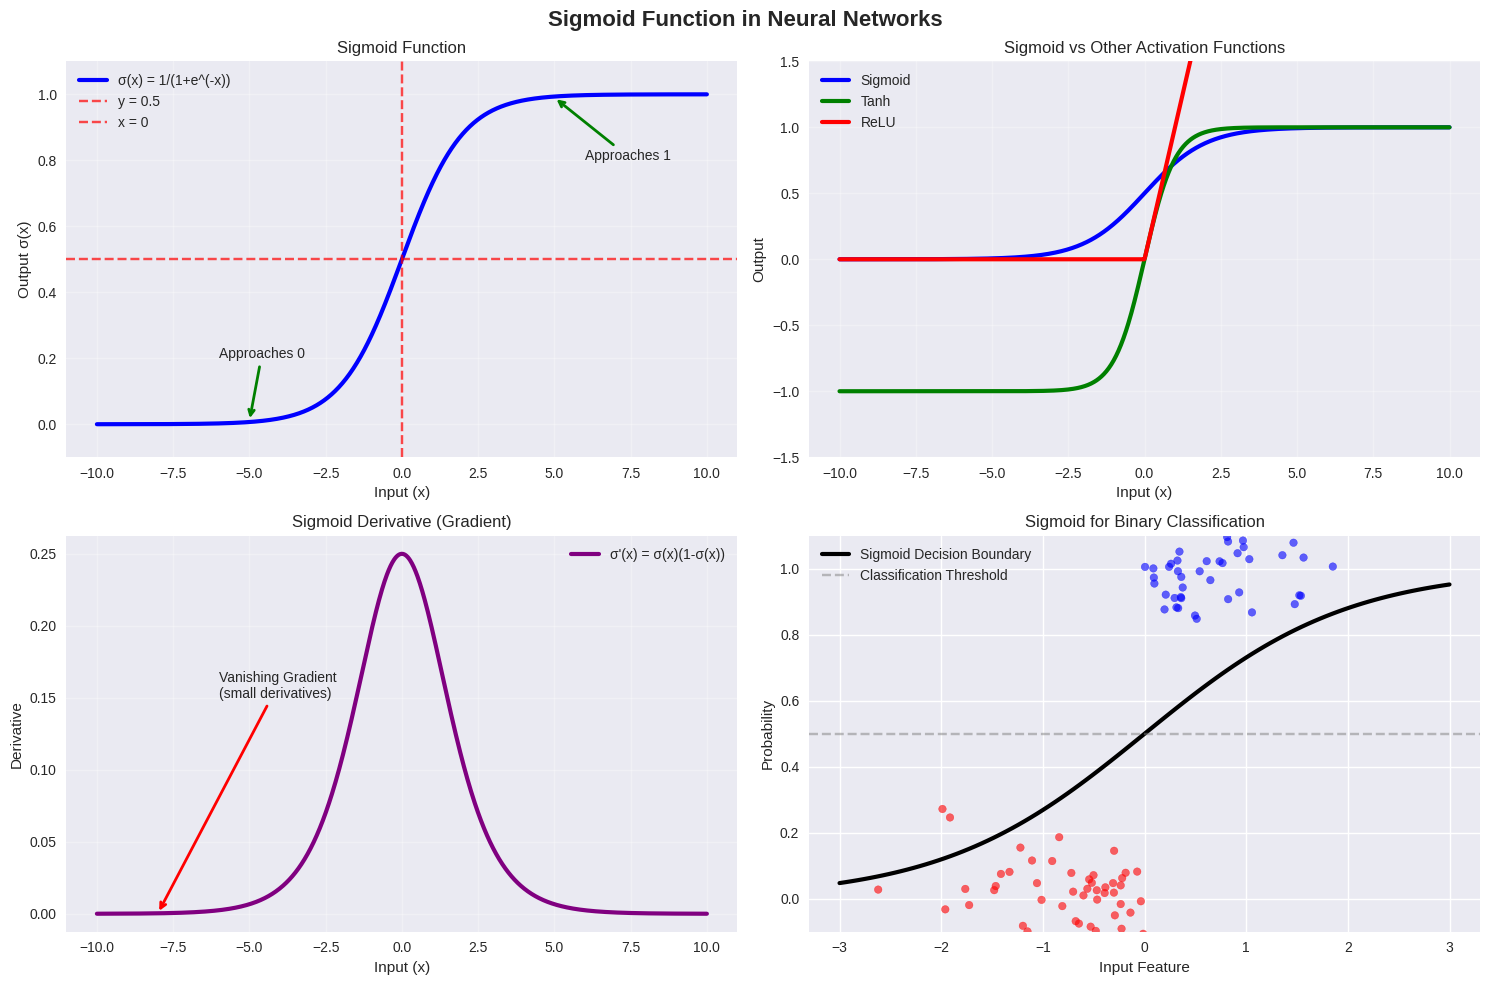

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    s = sigmoid(x)
    return s * (1 - s)

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Sigmoid Function in Neural Networks', fontsize=16, fontweight='bold')

# Generate x values
x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# Plot 1: Basic sigmoid function
ax1 = plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, 'b-', linewidth=3, label='σ(x) = 1/(1+e^(-x))')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='y = 0.5')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='x = 0')
plt.grid(True, alpha=0.3)
plt.xlabel('Input (x)')
plt.ylabel('Output σ(x)')
plt.title('Sigmoid Function')
plt.legend()
plt.ylim(-0.1, 1.1)

# Add annotations
plt.annotate('Approaches 1', xy=(5, 0.99), xytext=(6, 0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
plt.annotate('Approaches 0', xy=(-5, 0.01), xytext=(-6, 0.2),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

# Plot 2: Sigmoid vs other activation functions
ax2 = plt.subplot(2, 2, 2)
plt.plot(x, y_sigmoid, 'b-', linewidth=3, label='Sigmoid')
plt.plot(x, np.tanh(x), 'g-', linewidth=3, label='Tanh')
plt.plot(x, np.maximum(0, x), 'r-', linewidth=3, label='ReLU')
plt.grid(True, alpha=0.3)
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Sigmoid vs Other Activation Functions')
plt.legend()
plt.ylim(-1.5, 1.5)

# Plot 3: Sigmoid derivative (for understanding gradients)
ax3 = plt.subplot(2, 2, 3)
plt.plot(x, y_derivative, 'purple', linewidth=3, label="σ'(x) = σ(x)(1-σ(x))")
plt.grid(True, alpha=0.3)
plt.xlabel('Input (x)')
plt.ylabel('Derivative')
plt.title('Sigmoid Derivative (Gradient)')
plt.legend()

# Add annotation for vanishing gradient
plt.annotate('Vanishing Gradient\n(small derivatives)',
            xy=(-8, sigmoid_derivative(-8)), xytext=(-6, 0.15),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Plot 4: Sigmoid in action - simple classification example
ax4 = plt.subplot(2, 2, 4)

# Generate sample data
np.random.seed(42)
x_sample = np.random.randn(100)
y_sample = (x_sample > 0).astype(int) + 0.1 * np.random.randn(100)

# Plot data points
colors = ['red' if y < 0.5 else 'blue' for y in y_sample]
plt.scatter(x_sample, y_sample, c=colors, alpha=0.6, s=30)

# Plot sigmoid decision boundary
x_boundary = np.linspace(-3, 3, 100)
y_boundary = sigmoid(x_boundary)
plt.plot(x_boundary, y_boundary, 'k-', linewidth=3, label='Sigmoid Decision Boundary')

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Classification Threshold')
plt.xlabel('Input Feature')
plt.ylabel('Probability')
plt.title('Sigmoid for Binary Classification')
plt.legend()
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

### The ReLU

ReLU (Rectified Linear Unit) is probably the most widely used activation function in modern neural networks. It's deceptively simple - if the input is positive (eg > 0), it outputs the input. If the input is negative, it outputs zero. Consider the ReLU a gate that allows positive signals to pass through the network, discarding negative ones.

Here's the mathematical notation:

$f(x) = max(0,x)$

ReLU has become fairly ubiquitos in modern machine learning since sigmoid and other activation functions have gradients that can become very small for large input values, making it hard to train deep networks. This is known as the *vanishing gradient problem*.
Since ReLU has a constant gradient of 1 for positive inputs, gradients flow back through the network efficiently.
Other benefits include:
* Fast to compute
* Naturally creates sparsity by zeroing out negative activations. This can lead to more efficient models.

Here we are in Python:


In [4]:
def relu(x):
    """ReLU activation function - sets negative values to 0"""
    return np.maximum(0, x)

Again, we will apply this function to our random noise.

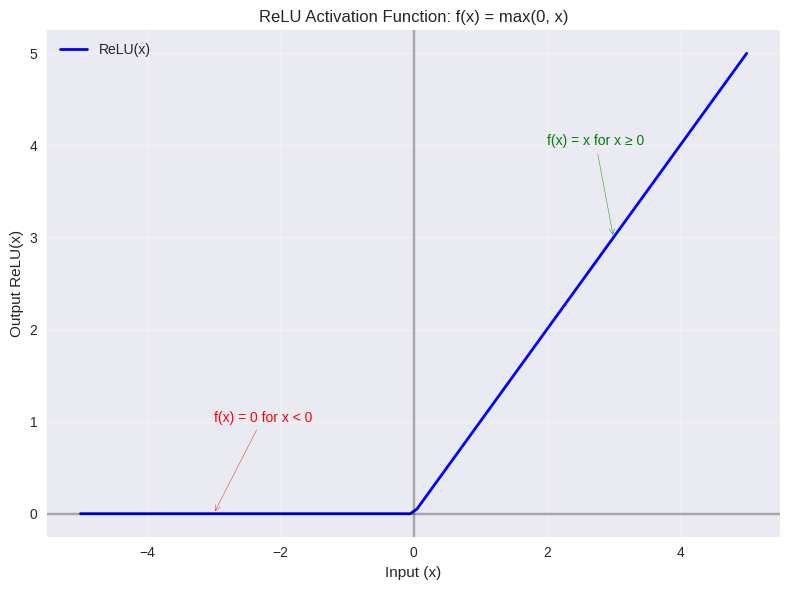

In [5]:
# Create input values from -5 to 5
x = np.linspace(-5, 5, 100)
y = relu(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2, label='ReLU(x)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Input (x)')
plt.ylabel('Output ReLU(x)')
plt.title('ReLU Activation Function: f(x) = max(0, x)')
plt.legend()

# Add annotations
plt.annotate('f(x) = 0 for x < 0', xy=(-3, 0), xytext=(-3, 1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')
plt.annotate('f(x) = x for x ≥ 0', xy=(3, 3), xytext=(2, 4),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=10, color='green')

plt.tight_layout()
plt.show()

### The Complete QuadraticModel Class

Now we have our inputs, weight assignment, ReLU, loss function, gradient descent and backpropagation, we can apply our model class to the toy problem again


In [6]:
import numpy as np

def mse_loss(y_pred, y_true):
    """Mean Squared Error loss function"""
    return np.mean((y_pred - y_true)**2)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return (x > 0).astype(float)

class QuadraticModel:
    def __init__(self, seed=42):
        np.random.seed(seed)
        self.a = np.random.randn()
        self.b = np.random.randn()
        self.c = np.random.randn()
        self.predictions_history = []

        # Store intermediate values for backpropagation
        self.cache = {}

    def forward(self, x):
        """Forward pass - compute predictions and cache intermediate values"""
        # Cache inputs for backpropagation
        self.cache['x'] = x
        self.cache['x_squared'] = x**2

        # Compute prediction
        # y_pred = self.a * self.cache['x_squared'] + self.b * x + self.c
        # Compute quadratic output (before activation)
        z = self.a * self.cache['x_squared'] + self.b * x + self.c
        self.cache['z'] = z  # Cache pre-activation values
        y_pred = relu(z)
        self.cache['relu_mask'] = (z > 0).astype(float)  # Cache ReLU derivative
        self.cache['y_pred'] = y_pred

        return y_pred

    def predict(self, x):
        """Alias for forward pass (for compatibility)"""
        return self.forward(x)

    def backward(self, y_true):
        """Backpropagation - compute gradients using cached values"""
        if 'y_pred' not in self.cache:
            raise ValueError("Must call forward() before backward()")

        # Get cached values
        x = self.cache['x']
        x_squared = self.cache['x_squared']
        y_pred = self.cache['y_pred']

        # Compute error (derivative of loss w.r.t. predictions)
        error = y_pred - y_true
        N = len(x)

        # Backpropagate through the model
        # dL/dy_pred = 2 * (y_pred - y_true) / N  (from MSE loss)
        # But we can work directly with error = y_pred - y_true

        relu_mask = self.cache['relu_mask']
        dL_dz = (2/N) * error * relu_mask

        # Gradients w.r.t. parameters
        dL_da = (2/N) * np.sum(error * x_squared)  # ∂L/∂a = ∂L/∂y_pred * ∂y_pred/∂a
        dL_db = (2/N) * np.sum(error * x)          # ∂L/∂b = ∂L/∂y_pred * ∂y_pred/∂b
        dL_dc = (2/N) * np.sum(error)              # ∂L/∂c = ∂L/∂y_pred * ∂y_pred/∂c

        # Store gradients
        self.gradients = {
            'dL_da': dL_da,
            'dL_db': dL_db,
            'dL_dc': dL_dc
        }

        # Compute loss
        loss = mse_loss(y_pred, y_true)

        return loss, dL_da, dL_db, dL_dc

    def compute_gradients(self, x, y_true):
        """Combined forward and backward pass (for compatibility)"""
        self.forward(x)
        return self.backward(y_true)

    def update_parameters(self, grads, lr):
        """Update parameters using gradients"""
        if isinstance(grads, tuple):
            # Handle old format: (loss, dL_da, dL_db, dL_dc)
            _, dL_da, dL_db, dL_dc = grads
        else:
            # Handle new format: dict
            dL_da = grads['dL_da']
            dL_db = grads['dL_db']
            dL_dc = grads['dL_dc']

        # Gradient descent update
        self.a -= lr * dL_da
        self.b -= lr * dL_db
        self.c -= lr * dL_dc

    def train(self, x, y, epochs=100, lr=0.01, verbose=True):
        """Training loop using explicit forward/backward passes"""
        loss_history = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(x)

            # Backward pass
            loss, dL_da, dL_db, dL_dc = self.backward(y)

            # Update parameters
            self.update_parameters(self.gradients, lr)

            loss_history.append(loss)

            # Logging and history tracking
            if epoch % 10 == 0 or epoch == epochs - 1:
                self.predictions_history.append((epoch, y_pred.copy()))
                if verbose:
                    print(f"Epoch {epoch:3}: a={self.a:.3f}, b={self.b:.3f}, c={self.c:.3f}, Loss={loss:.3f}")

        return loss_history

    def zero_gradients(self):
        """Reset gradients (useful for more complex training loops)"""
        self.gradients = {
            'dL_da': 0.0,
            'dL_db': 0.0,
            'dL_dc': 0.0
        }
        self.cache = {}

# Example usage
if __name__ == "__main__":
    # Generate some synthetic quadratic data
    np.random.seed(123)
    x_train = np.linspace(-2, 2, 100)
    true_a, true_b, true_c = 1.5, -0.5, 2.0
    y_train = true_a * x_train**2 + true_b * x_train + true_c + 0.1 * np.random.randn(100)

    # Create and train model
    model = QuadraticModel(seed=42)
    print("Training with explicit backpropagation:")
    print(f"True parameters: a={true_a}, b={true_b}, c={true_c}")
    print(f"Initial parameters: a={model.a:.3f}, b={model.b:.3f}, c={model.c:.3f}")
    print()

    loss_history = model.train(x_train, y_train, epochs=50, lr=0.01)

    print(f"\nFinal parameters: a={model.a:.3f}, b={model.b:.3f}, c={model.c:.3f}")

Training with explicit backpropagation:
True parameters: a=1.5, b=-0.5, c=2.0
Initial parameters: a=0.497, b=-0.138, c=0.648

Epoch   0: a=0.600, b=-0.148, c=0.702, Loss=9.054
Epoch  10: a=1.268, b=-0.233, c=1.075, Loss=1.989
Epoch  20: a=1.549, b=-0.297, c=1.264, Loss=0.578
Epoch  30: a=1.661, b=-0.346, c=1.372, Loss=0.270
Epoch  40: a=1.700, b=-0.383, c=1.442, Loss=0.183
Epoch  49: a=1.707, b=-0.408, c=1.489, Loss=0.149

Final parameters: a=1.707, b=-0.408, c=1.489
